In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [18]:
df = pd.read_csv('stocks/total_data_price_Symbol.csv', index_col='Symbol')
df.head()

,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-19,2019-02-20,2019-02-21,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
Symbol,,,,,,,,,,,,,,,,,,,,,
A,75.145678,74.977549,74.905022,75.478650,75.956675,76.266566,76.672066,76.761075,77.268776,77.133611,...,83.646706,83.553805,83.573713,83.985128,84.592298,84.854411,84.940674,84.993759,84.920527,84.933851
AAL,36.135525,35.829624,35.773708,35.635560,35.704636,35.546753,35.316507,35.073104,34.727735,34.704711,...,27.790633,27.963329,28.172555,28.424956,28.856693,29.065921,29.275147,28.989536,28.697282,28.368497
AAP,159.906713,160.222005,162.847234,164.427007,165.771154,166.969269,167.666239,167.891917,166.982544,164.101756,...,155.066177,156.003169,157.013077,157.079549,157.744339,159.103836,159.486094,158.947617,158.465642,158.761475
AAPL,169.694194,168.701197,167.367009,167.590144,167.514664,167.964223,167.810003,168.056107,168.459712,168.669718,...,277.063985,278.586243,278.639313,278.317607,279.730418,281.139913,284.612254,286.535797,288.940236,290.180583
ABBV,72.803335,72.797213,73.008336,73.240878,73.583570,73.813049,74.094543,74.011930,73.849765,73.207219,...,86.636609,87.119456,86.905579,86.649572,86.947703,87.297684,87.472677,87.132416,86.701421,86.283389


In [4]:
symbols = df.index.to_numpy()
data = df.to_numpy()

In [5]:
# define normalizer
normalizer = Normalizer()

# create a K-means model with 20 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000 , n_init = 50)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(data)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=50, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [6]:
# predict cluster labels
labels = pipeline.predict(data)

# create a DataFrame aligning labels & companies
df_result = pd.DataFrame({'Cluster': labels, 'Symbol': symbols})

# display df sorted by cluster labels
df_result = df_result.sort_values('Cluster')

df_result = df_result.set_index('Symbol')
df_result.to_csv('KMean-Cluster.csv')

df_result.head()


,Cluster
Symbol,
HAS,0
BLL,0
RSG,0
BKNG,0
EVRG,0


In [40]:
def calculate_risk_return(df_result, from_date , to_date):
    
    cluster_return = []
    cluster_risk = []
    clusters = df_result['Cluster'].unique()
    
    for cls in clusters:
        cluster_list =  df_result[df_result['Cluster'] == cls].index
        for ticker in cluster_list:

            filename = ('stocks/{0}.csv').format(ticker)
            data = pd.read_csv(filename)
            data = data.loc[ (data['Date'] >= from_date) & (data['Date'] <= to_date)]

            data['Close1']  = data['Adj Close'].shift()
            data['Return'] = data['Adj Close'] - data["Close1"]
            data['Profit'] =  data['Return'].cumsum()
            
            ticker_return =   data['Profit'].mean()
            ticker_risk = data['Profit'].std()         

            cluster_return.append(np.round(ticker_return,4))
            cluster_risk.append(np.round(ticker_risk,4))

        print(np.mean(cluster_return) , np.mean(cluster_risk))
    

In [41]:

calculate_profit(df_result, '2019-01-01' , '2019-12-31')

26.45058271604938 12.108313580246913
19.971608196721313 10.2396368852459
19.853442079207923 10.045858415841582
17.4521625 9.150871691176471
24.54246607142857 12.632165476190478
23.21570617977528 12.529204775280897
22.006519623655915 12.533310752688172
22.201044240837696 12.73201989528796
22.272102603036878 12.047098047722342
21.29853800813008 12.016440040650407


In [44]:
def plot_cluster(df, cluster_symbols):
    
    sns.set(rc={'figure.figsize':(16, 16)})
    
    df_ = pd.DataFrame()
    for s in cluster_symbols[:5]: 
        df_[s] = df.loc[s]

    df_.plot(subplots=True, legend=False)
    plt.show()


1 Index(['ETFC', 'DD', 'CNP', 'SEE', 'LNC', 'ROL', 'NFLX', 'PXD', 'CTSH', 'NLSN',
       'EOG', 'CSX', 'CSCO', 'PFE', 'EXC', 'MO', 'HST', 'GLW', 'ALXN', 'IVZ',
       'AMCR', 'FTV', 'JNPR', 'HBI', 'WMB', 'ULTA', 'BA', 'BEN', 'UA', 'UAA',
       'NBL', 'SPG', 'CHRW', 'TXT', 'FANG', 'XLNX', 'FDX', 'XOM', 'TAP', 'BKR',
       'AAL'],
      dtype='object', name='Symbol')


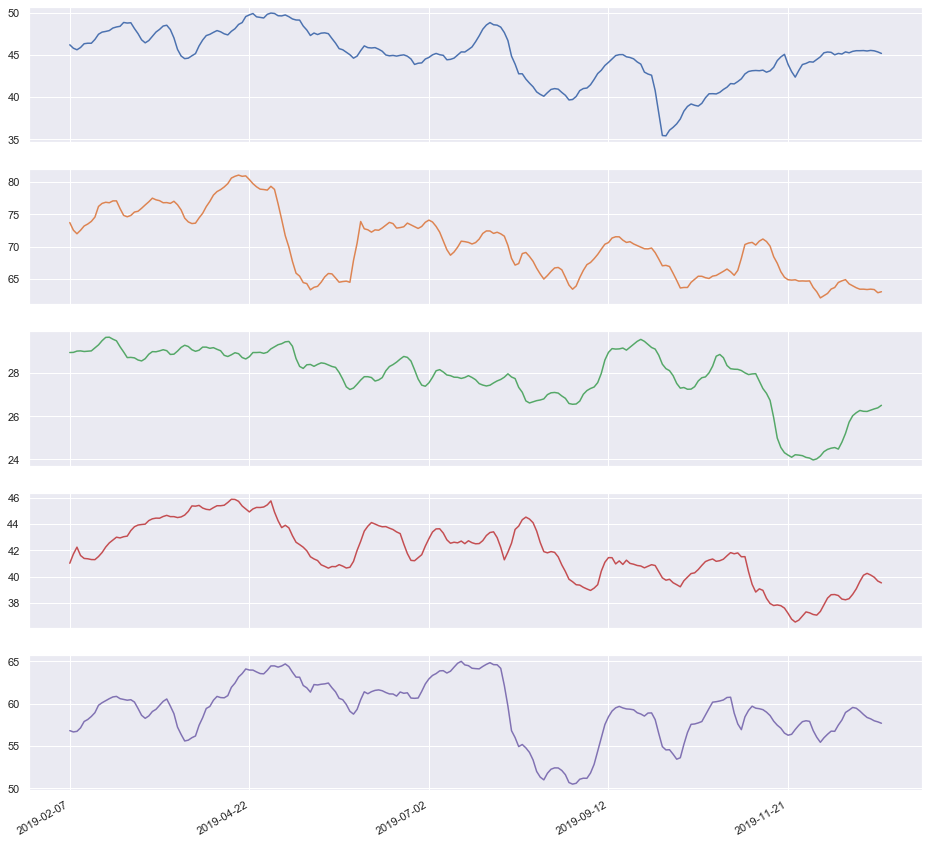

In [47]:
cls_n = 1
cluster_list =  df_result[df_result['Cluster'] == cls_n].index
print(cls_n, cluster_list)
plot_cluster(df, cluster_list )